## Encapsulation

Інкапсуляція в програмуванні, зокрема в об'єктно-орієнтованому програмуванні (ООП), є одним із ключових принципів, який полягає в приховуванні внутрішньої структури класу та захисті його даних від прямого доступу ззовні. Цей принцип дозволяє обмежити доступ до певних компонентів класу (полів і методів), забезпечуючи контроль над тим, як ці дані використовуються та змінюються.

За допомогою атрибутів та методів класу ми виконуємо інкапсуляцію — приховуємо деталі реалізації під інтерфейсом класу.




![OOP](<attachment:dc873362-1138-482e-b03a-3c97f9e7259bUntitled - 2024-02-06T151020.643.png>)
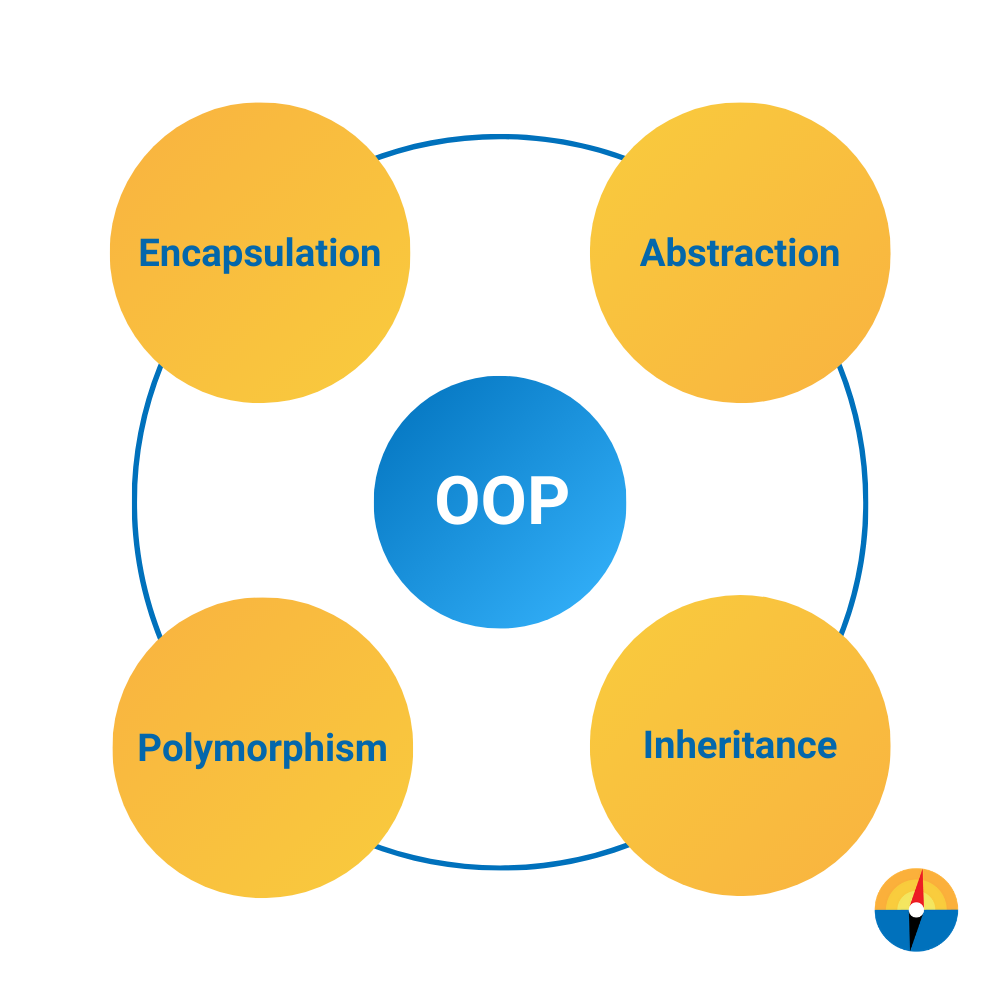

![Alt text](encapsulation.png)

In [1]:
class Person:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def greeting(self) -> str:
        return f"Hi {self.name}"

p = Person("Boris", 34)



- **Public** - елемент доступний з будь-якого місця в програмі.
- **Protected** - елемент доступний з класу, в якому він оголошений, а також з класів-похідних.
- **Private** - елемент доступний лише з класу, в якому він оголошений.


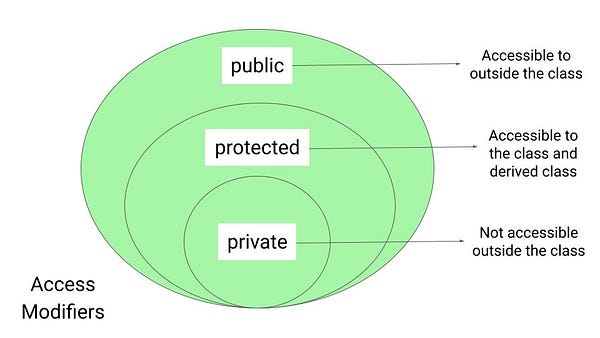

## Protected

Вони позначаються одним підкресленням _ на початку імені. Це лише конвенція, і захищені атрибути все ще можуть бути доступні ззовні, але це вважається поганою практикою змінювати їх ззовні.

In [2]:
class Person:
    def __init__(self, name: str, age: int, is_active: bool):
        self.name = name
        self.age = age
        self._is_active = is_active

    def greeting(self):
        return f"Hi {self.name}"

p = Person("Boris", 34, True)
print(p.name, p.age, p._is_active)
print(p.greeting())


Boris 34 True
Hi Boris


Правильним підходом є забезпечення доступу до захищених атрибутів через публічні методи, які можуть включати додаткову логіку обробки або перевірки, тим самим підтримуючи безпеку та цілісність даних всередині класу.

Якщо ми хочемо взаємодіяти з захищеними полями об'єкту ззовні, необхідно впровадити правильний підхід до інкапсуляції у класі Person та слід використовувати методи для взаємодії з такими атрибутами об'єкту


In [3]:
class Person:
    def __init__(self, name: str, age: int, is_active: bool):
        self.name = name
        self.age = age
        self._is_active = is_active

    def greeting(self):
        return f"Hi {self.name}"
    
    def is_active(self):
        return self._is_active

    def set_active(self, active: bool):
        self._is_active = active

p = Person("Boris", 34, True)
print(p.name, p.age, p.is_active())
print(p.greeting())


Boris 34 True
Hi Boris


## Private

В Python не існує справжньої приватності для атрибутів класів, як це реалізовано, наприклад, у Java. Python використовує так зване "перетворення імен" для забезпечення цього рівня інкапсуляції. Атрибути, що вважаються приватними позначаються двома підкресленнями __ і не можуть бути доступні безпосередньо ззовні класу.


In [5]:
class Person:
    def __init__(self, name: str, age: int, is_active: bool, is_admin: bool):
        self.name = name
        self.age = age
        self._is_active = is_active
        self.__is_admin = is_admin

    def greeting(self):
        return f"Hi {self.name}"

    def is_active(self):
        return self._is_active

    def set_active(self, active: bool):
        self._is_active = active

p = Person("Boris", 34, True, False)
print(p._Person__is_admin)


False


In [6]:
class Person:
    def __init__(self, name: str, age: int, is_active: bool, is_admin: bool):
        self.name = name
        self.age = age
        self._is_active = is_active
        self.__is_admin = is_admin

    def greeting(self):
        return f"Hi {self.name}"

    def is_active(self):
        return self._is_active

    def set_active(self, active: bool):
        self._is_active = active

    def get_is_admin(self):
        return self.__is_admin

    def set_is_admin(self, is_admin: bool):
        # Тут можна додати будь-яку логіку перевірки або обробки
        self.__is_admin = is_admin

        
p = Person("Boris", 34, True, False)
print(p.get_is_admin())
p.set_is_admin(True)
print(p.get_is_admin())


False
True


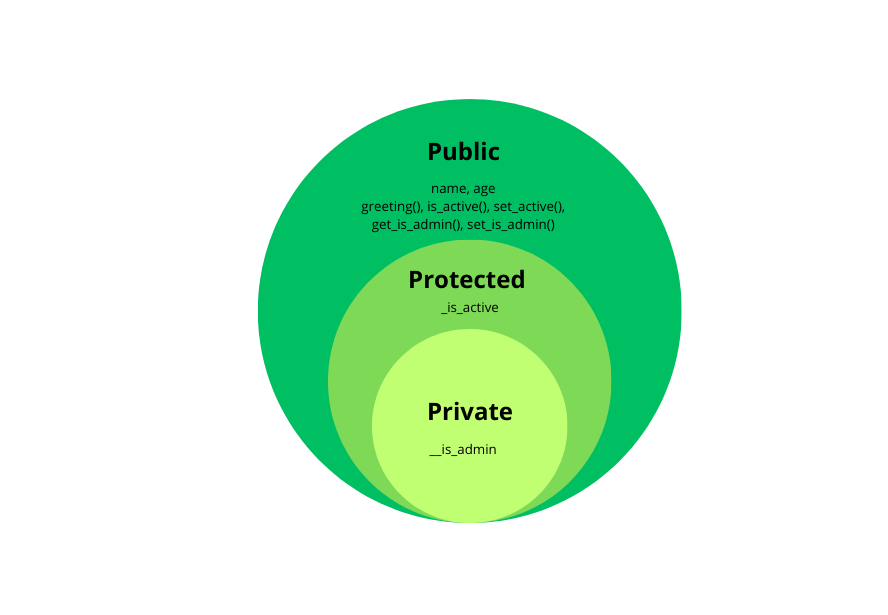

## Inheritance

**Наслідування** - це механізм ООП, який дозволяє одному класу переймати властивості та методи іншого класу. У Python це робиться шляхом оголошення класу, який "наслідується" від іншого класу.

**Базовий** або батьківський клас (superclass) це клас, від якого наслідуються властивості та методи.

**Похідний** або дочірній клас (subclass) це клас, який наслідує властивості та методи від базового класу.

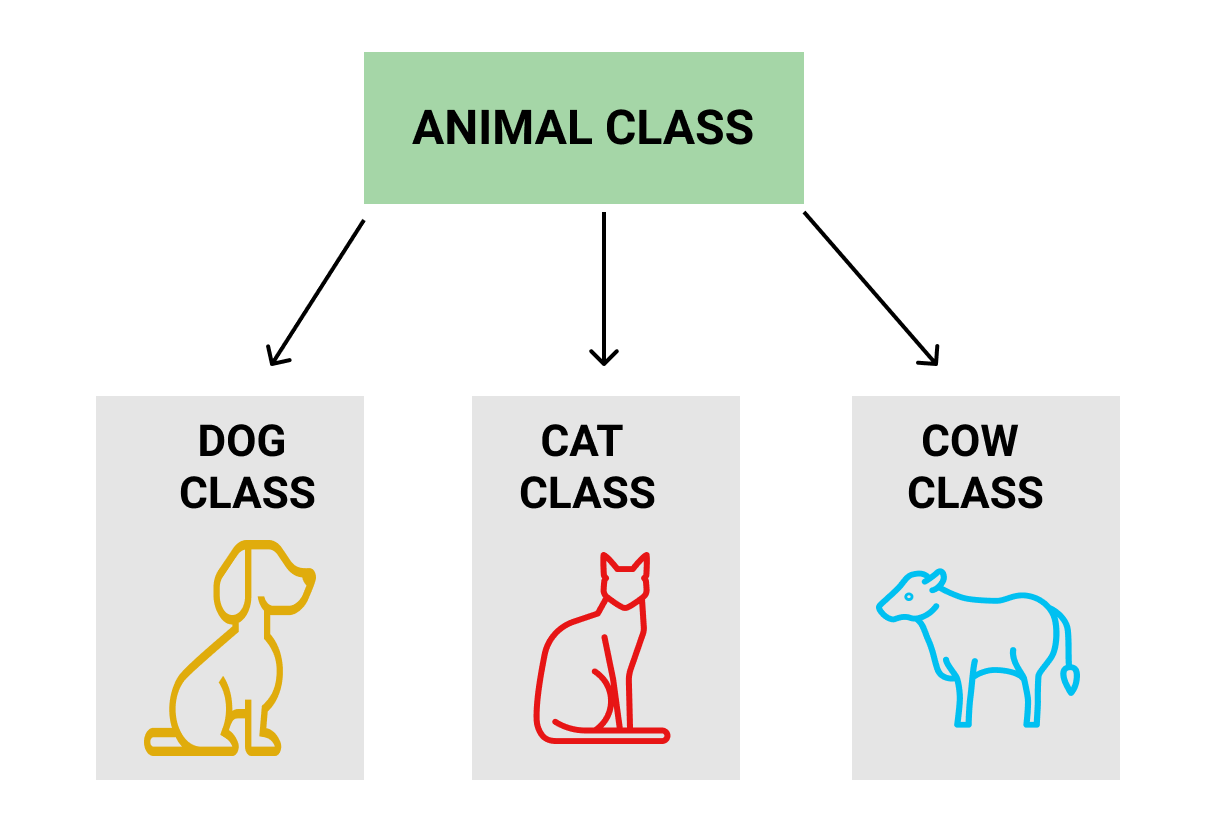

In [7]:
class Animal:
    def __init__(self, nickname: str, age: int):
        self.nickname = nickname
        self.age = age

    def make_sound(self):
        pass

class Cat(Animal):
    def make_sound(self) -> str:
        return "Meow"

class Dog(Animal):
    def make_sound(self) -> str:
        return "Woof"

class Cow(Animal):  
    def make_sound(self):
        return "Moo"

my_cat = Cat("Simon", 4)
my_dog = Dog("Rex", 5)
my_cow = Cow("Bessie", 3)

print(my_cat.make_sound())  # Виведе "Meow"
print(my_dog.make_sound())  # Виведе "Woof"
print(my_cow.make_sound())  # Виведе "Moo"


Meow
Woof
Moo


In [14]:
class Animal:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def make_sound(self):
        pass


class Dog(Animal):
    def __init__(self, name: str, age: int, breed: str):
        super().__init__(name, age)  # Викликаємо конструктор базового класу
        self.breed = breed  # Додаємо нову властивість

    def make_sound(self):
        return "Woof"
    
    def chase_tail(self) -> str:
        return f"{self.name} is chasing its tail!"
    
my_dog = Dog("Rex", 5, "Golden Retriever")
print(my_dog.make_sound())  # Виведе "Woof"
print(my_dog.chase_tail())  # Виведе "Rex is chasing its tail!"



Woof
Rex is chasing its tail!


In [15]:
class Animal:
    def __init__(self, nickname: str, age: int):
        self.nickname = nickname
        self.age = age

    def make_sound(self):
        pass

class Cat(Animal):
    def make_sound(self) -> str:
        return "Meow"

class Dog(Animal):

    def __init__(self, nickname: str, age: int, breed: str):
        super().__init__(nickname, age)  # Викликаємо конструктор базового класу
        self.breed = breed  # Додаємо нову властивість

    def make_sound(self) -> str:
        return "Woof"

    def chase_tail(self) -> str:
        return f"{self.nickname} is chasing its tail!"

class Cow(Animal):
    def make_sound(self):
        return "Moo"

my_cat = Cat("Simon", 4)
my_cow = Cow("Bessie", 3)

print(my_cat.make_sound())  # Виведе "Meow"
print(my_cow.make_sound())  # Виведе "Moo"

my_dog = Dog("Rex", 5, "Golden Retriever")
print(my_dog.make_sound())  # Виведе "Woof"
print(my_dog.chase_tail())  # Виведе "Rex is chasing its tail!"


Meow
Moo
Woof
Rex is chasing its tail!


## Багаторівневе наслідування та Method Resolution Order (MRO).

Уявімо, що ми маємо клас Bird і хочемо створити клас Parrot, який наслідує від Bird. Але потім ми вирішуємо створити новий клас TalkingParrot, який наслідується вже від Parrot.

In [16]:
class Animal:
    def __init__(self, nickname: str, age: int):
        self.nickname = nickname
        self.age = age

    def make_sound(self):
        pass

class Bird(Animal):
    def make_sound(self):
        return "Chirp"

class Parrot(Bird):
    def can_fly(self):
        return True

class TalkingParrot(Parrot):
    def say_phrase(self, phrase):
        return f"The parrot says: '{phrase}'"

my_parrot = TalkingParrot("Alice", 2)
print(my_parrot.make_sound())
print(my_parrot.can_fly())
print(my_parrot.say_phrase("Hello, World!"))


Chirp
True
The parrot says: 'Hello, World!'


MRO у Python працює наступним чином:

1. Шукає атрибут серед атрибутів самого класу. Саме завдяки цьому ви можете "перевизначати" батьківські атрибути.
2. Шукає атрибут у першого з батьків (той, що вказаний першим у списку батьків).
3. Шукає атрибут у наступного батька у списку батьків, доки такі є.
4. Шукає атрибут у батьках першого батька.
5. Повторює пункт 4 для всіх батьків.
6. Викликає виняток, що атрибут не знайдено.

Пошуки закінчуються, як тільки атрибут знайдено.


Ви можете переглянути MRO для будь-якого класу використовуючи метод mro() або атрибут __mro__. Наприклад:

In [17]:
class A:
    pass

class B(A):
    pass

class C(A):
    pass

class D(B, C):
    pass

print(D.mro())  # Виведе порядок розв'язання методів для класу D


[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


In [18]:
class A:
    name = "Я клас A"

class B:
    name = "Я клас B"
    property = "Я знаходжусь в класі B"

class C(A, B):
    property = "Я знаходжусь в класі C"

c = C()
print(c.name)
print(c.property)


Я клас A
Я знаходжусь в класі C


## Поліморфізм та качина типізація


In [19]:
class Animal:
    def __init__(self, nickname: str, age: int):
        self.nickname = nickname
        self.age = age

    def make_sound(self):
        pass

class Cat(Animal):
    def make_sound(self):
        return "Meow"

class Dog(Animal):
    def make_sound(self):
        return "Woof"

def animal_sounds(animals):
    for animal in animals:
        print(animal.make_sound())

animals = [Cat("Simon", 4), Dog("Rex", 5)]
animal_sounds(animals)


Meow
Woof


Таким чином, поліморфізм дозволяє функції animal_sounds взаємодіяти з об'єктами Cat та Dog як з об'єктами Animal, використовуючи їхні спільні інтерфейси, не зважаючи на різницю в їх внутрішній реалізації. Це робить код більш гнучким і він легше адаптується до змін, оскільки ми можемо додавати нові класи, які наслідують від Animal, без необхідності змінювати функцію animal_sounds.

### Duck Typing

Качина типізація (Duck Typing) - це концепція в програмуванні, яка відіграє важливу роль в динамічно типізованих мовах, таких як Python. Назва походить від англійського вислову "Якщо це ходить як качка і крякає як качка, то це, ймовірно, качка".

In [20]:
class Duck:
    def quack(self):
        print("Quack, quack!")

class Person:
    def quack(self):
        print("I'm Quacking Like a Duck!")

def make_it_quack(duck):
    duck.quack()

duck = Duck()
person = Person()

make_it_quack(duck)
make_it_quack(person)


Quack, quack!
I'm Quacking Like a Duck!


In [21]:
class Dog:
    def speak(self) -> str:
        return "Woof"

class Cat:
    def speak(self) -> str:
        return "Meow"

class Robot:
    def speak(self) -> str:
        return "Beep boop"

def make_it_speak(speaker) -> None:
    print(speaker.speak())

dog = Dog()
cat = Cat()
robot = Robot()

make_it_speak(dog)  # Виведе: Woof
make_it_speak(cat)  # Виведе: Meow
make_it_speak(robot)  # Виведе: Beep boop


Woof
Meow
Beep boop


Щоб занотувати тип параметра функції speaker ми можемо використати typing.Protocol, який визначає набір методів, які цей параметр має виконувати, не прив'язуючись до конкретного класу.

Створимо інтерфейс, використовуючи typing.Protocol, для об'єктів, які можуть "говорити". Ми хочемо, щоб будь-який об'єкт, який має метод speak, вважався сумісним з цим інтерфейсом.

In [22]:
from typing import Protocol

class Speaker(Protocol):
    def speak(self) -> str:
        pass

class Dog:
    def speak(self) -> str:
        return "Woof"

class Cat:
    def speak(self) -> str:
        return "Meow"

class Robot:
    def speak(self) -> str:
        return "Beep boop"

def make_it_speak(speaker: Speaker) -> None:
    print(speaker.speak())

dog = Dog()
cat = Cat()
robot = Robot()

make_it_speak(dog)  # Виведе: Woof
make_it_speak(cat)  # Виведе: Meow
make_it_speak(robot)  # Виведе: Beep boop


Woof
Meow
Beep boop


Результат буде той самий але статична типізація за допомогою typing.Protocol використовується для вказівки, що параметр speaker повинен відповідати інтерфейсу, який має метод speak.


## Класи контейнери

Правильний спосіб отримати модифікований контейнер — це використовувати пакет collections та класи `UserList`, `UserDict`, `UserString`, які в ньому є.

Всі ці класи поводяться точно як вбудовані контейнери з тією лише відмінністю, що самі дані лежать у полі data у цих класів і ви можете використовувати це поле на свій розсуд.



### UserDict

In [23]:
from collections import UserDict

class MyDictionary(UserDict):
    # Приклад додавання нового методу
    def add_key(self, key, value):
        self.data[key] = value

# Створення екземпляра власного класу
my_dict = MyDictionary({'a': 1, 'b': 2})
my_dict.add_key('c', 3)
print(my_dict)



{'a': 1, 'b': 2, 'c': 3}


In [24]:
from collections import UserDict

contacts = [
    {
        "name": "Allen Raymond",
        "email": "nulla.ante@vestibul.co.uk",
        "phone": "(992) 914-3792",
        "favorite": False,
    },
    {
        "name": "Chaim Lewis",
        "email": "dui.in@egetlacus.ca",
        "phone": "(294) 840-6685",
        "favorite": False,
    },
    {
        "name": "Kennedy Lane",
        "email": "mattis.Cras@nonenimMauris.net",
        "phone": "(542) 451-7038",
        "favorite": True,
    }
]

class Customer(UserDict):
    def phone_info(self):
        return f"{self.get('name')}: {self.get('phone')}"

    def email_info(self):
        return f"{self.get('name')}: {self.get('email')}"

if __name__ == "__main__":
    customers = [Customer(el) for el in contacts]

    print("---------------------------")

    for customer in customers:
        print(customer.phone_info())

    print("---------------------------")

    for customer in customers:
        print(customer.email_info())


---------------------------
Allen Raymond: (992) 914-3792
Chaim Lewis: (294) 840-6685
Kennedy Lane: (542) 451-7038
---------------------------
Allen Raymond: nulla.ante@vestibul.co.uk
Chaim Lewis: dui.in@egetlacus.ca
Kennedy Lane: mattis.Cras@nonenimMauris.net


### UserList

`UserList` - це клас, який дозволяє створювати власні версії списків з додатковими функціями. Ви можете додавати нові методи або змінювати ті, що вже існують, щоб вони працювали по-іншому. Це корисно, коли вам потрібен список, який робить щось спеціальне, чого не робить звичайний список Python.


In [25]:
from collections import UserList

class MyList(UserList):
    # Додавання спеціалізованої поведінки. Наприклад, метод для додавання елемента, якщо він ще не існує
    def add_if_not_exists(self, item):
        if item not in self.data:
            self.data.append(item)

# Створення екземпляру MyList
my_list = MyList([1, 2, 3])
print("Оригінальний список:", my_list)

# Додавання елементу, якщо він не існує
my_list.add_if_not_exists(3)  # Не додасться, бо вже існує
my_list.add_if_not_exists(4)  # Додасться, бо ще не існує
print("Оновлений список:", my_list)


Оригінальний список: [1, 2, 3]
Оновлений список: [1, 2, 3, 4]


In [26]:
from collections import UserList

class CountableList(UserList):
    def sum(self):
        return sum(map(lambda x: int(x), self.data))

countable = CountableList([1, '2', 3, '4'])
countable.append('5')
print(countable.sum())


15


### UserString

Останнім розглянемо UserString який є класом, аналогічним до UserList, але для рядків. Він дозволяє створювати класи, які наслідують поведінку звичайного рядка, з можливістю додавання нових методів або зміни стандартної поведінки рядків. Це корисно, коли вам потрібно працювати з рядками спеціалізованим чином, який не підтримується стандартними рядками Python.

In [27]:
from collections import UserString

# Створення класу, який розширює UserString
class MyString(UserString):
    # Додавання методу, який перевіряє, чи рядок є паліндромом
    def is_palindrome(self):
        return self.data == self.data[::-1]

# Створення екземпляру MyString
my_string = MyString("radar")
print("Рядок:", my_string)
print("Чи є паліндромом?", my_string.is_palindrome())

# Створення іншого екземпляру MyString
another_string = MyString("hello")
print("Рядок:", another_string)
print("Чи є паліндромом?", another_string.is_palindrome())


Рядок: radar
Чи є паліндромом? True
Рядок: hello
Чи є паліндромом? False


Останній приклад показує модифікований рядок з методом truncate, який обмежує розмір рядка до MAX_LEN символів.


In [28]:
from collections import UserString

class TruncatedString(UserString):
    MAX_LEN = 7

    def truncate(self):
        self.data = self.data[:self.MAX_LEN]

ts = TruncatedString('hello world!')
ts.truncate()
print(ts)


hello w


## dataclasses

Модуль [`dataclasses`](https://docs.python.org/3/library/dataclasses.html#module-dataclasses) в Python надає засіб для декларативного визначення класів, які переважно використовуються для зберігання даних. Цей модуль введений у Python 3.7, щоб спростити створення таких класів без необхідності ручного написання бойлерплейт (від англ. - boilerplate) коду, який часто повторюється у традиційних класах.

☝ Використання @dataclass дозволяє зменшити кількість коду, необхідного для створення класів, які в основному зберігають дані. Це робить код більш читабельним і легшим для розуміння, а також автоматично створює конструктор класу __init__.

```from dataclasses import dataclass

@dataclass
class ExampleClass:
    attribute1: type
    attribute2: type = default_value
```


Традиційно, якщо вам потрібно створити клас для зберігання даних, ви б мали б вручну визначити метод `__init__` для ініціалізації атрибутів.

```class Person:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age
```

Якщо використати декоратор @dataclass, ми можемо автоматизувати створення класу, значно спростивши код.

```from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int
```

В наступному прикладі клас Article містить атрибути зі стандартними значеннями. Це корисно, коли деякі поля мають звичайні значення, які не вимагають вказівки при кожному створенні об'єкта:


```@dataclass
class Article:
    title: str
    author: str
    views: int = 0
```

In [30]:
from dataclasses import dataclass

@dataclass
class Rectangle:
    width: int
    height: int

    def area(self) -> int:
        return self.width * self.height


rect1 = Rectangle(10, 5)
rect2 = Rectangle(7, 3)
rect3 = Rectangle(8, 6)


print(f"Площа прямокутника 1: {rect1.area()}")
print(f"Площа прямокутника 2: {rect2.area()}")
print(f"Площа прямокутника 3: {rect3.area()}")


Площа прямокутника 1: 50
Площа прямокутника 2: 21
Площа прямокутника 3: 48


В підсумку ми бачимо, що декоратор @dataclass використовується, коли ви створюєте класи, що слугують для зберігання даних і не потребують складної логіки обробки. Наприклад, класи, що представляють сутності в базі даних, конфігураційні об'єкти, об'єкти передачі даних між компонентами системи тощо.

## Enumeration

Перелічуваний тип даних ([Enumeration](https://uk.wikipedia.org/wiki/Перелічуваний_тип_даних)), часто скорочено як **Enum**, - це спосіб визначення набору іменованих констант у мовах програмування, що дозволяє використовувати більш зрозумілі імена для цих констант замість простих числових значень. Enum визначає символічні імена для набору пов'язаних значень, полегшуючи читання та розуміння коду.

Перелічення часто зустрічаються в ситуаціях, де потрібно представити обмежену кількість варіантів, таких як:

- Дні тижня
- Статуси замовлень (наприклад, "новий", "в обробці", "відправлений", "доставлений")
- Ролі чи рівні доступу в системі безпеки (наприклад ролі, “користувач”, “модератор”, “адміністратор”)

Використання Enum допомагає уникнути помилок, пов'язаних з використанням неправильних значень, і робить програмний код більш безпечним і легким для підтримки.

Модуль enum в Python надає можливість для створення перелічуваних типів, які дозволяють визначати іменовані константи. Ці константи можуть бути використані для покращення читабельності та надійності коду, замінюючи використання неявних значень, таких як рядки або числа, на більш зрозумілі імена.

Клас **Enum** з модуля **enum** дозволяє об'єднати ряд іменованих констант і гарантувати, що об'єкти цього класу можуть приймати тільки одне з обмежених значень, які вони описують.

Для створення перелічення використовується наслідування від класу Enum. Кожен атрибут класу представляє окремий член перелічення.

In [31]:
from enum import Enum

class Day(Enum):
    MONDAY = 1
    TUESDAY = 2
    WEDNESDAY = 3
    THURSDAY = 4
    FRIDAY = 5
    SATURDAY = 6
    SUNDAY = 7


today = Day.MONDAY
print(today)  # Виведе: Day.MONDAY

if today == Day.MONDAY:
    print("Сьогодні понеділок.")
else:
    print("Сьогодні не понеділок.")


Day.MONDAY
Сьогодні понеділок.


In [32]:
print(today.name)  
print(today.value)  


MONDAY
1


In [33]:
day_from_value = Day(1)
print(day_from_value)  # Виведе: Day.MONDAY


Day.MONDAY


наближений до реальності приклад використання Enum, де ми створимо систему управління статусами замовлень для інтернет-магазину. 
У цьому прикладі, Enum використовується для створення чітко визначеного набору статусів:
- "Новий" (NEW), 
- "В обробці" (PROCESSING), 
- "Відправлено" (SHIPPED),
- "Доставлено" (DELIVERED).

1. визначити Enum, який буде представляти різні статуси замовлень.
2.  auto(), щоб автоматично присвоїти унікальні значення кожному статусу, уникаючи необхідності вручну вказувати їх.
3. Тепер створимо клас Order, який буде використовувати наш перелічуваний тип даних OrderStatus для відстеження статусу замовлення.


In [37]:
from enum import Enum, auto

class OrderStatus(Enum):
    NEW = auto()
    PROCESSING = auto()
    SHIPPED = auto()
    DELIVERED = auto()


class Order:
    def __init__(self, name: str, status: OrderStatus):
        self.name = name
        self.status = status

    def update_status(self, new_status: OrderStatus):
        self.status = new_status
        print(f"Замовлення '{self.name}' оновлено до статусу {self.status.name}.")

    def display_status(self):
        print(f"Статус замовлення '{self.name}': {self.status.name}.")


order1 = Order("Ноутбук", OrderStatus.NEW)
order2 = Order("Книга", OrderStatus.NEW)

order1.display_status()
order2.display_status()

order1.update_status(OrderStatus.PROCESSING)
order2.update_status(OrderStatus.SHIPPED)

order1.display_status()
order2.display_status()


Статус замовлення 'Ноутбук': NEW.
Статус замовлення 'Книга': NEW.
Замовлення 'Ноутбук' оновлено до статусу PROCESSING.
Замовлення 'Книга' оновлено до статусу SHIPPED.
Статус замовлення 'Ноутбук': PROCESSING.
Статус замовлення 'Книга': SHIPPED.


Оскільки об'єкт Enum може приймати лише значення, визначені в переліку, це зменшує ймовірність помилок, пов'язаних з передачею невірних значень.

Зміна або додавання нових значень в Enum не впливає на решту коду, що робить зміну ([рефакторінг](https://uk.wikipedia.org/wiki/Рефакторинг)) та розширення коду простішими. Наприклад, щоб додати новий статус "Відмінений"(CANCELED), ви просто розширите визначення OrderStatus таким чином:


In [ ]:
from enum import Enum, auto

class OrderStatus(Enum):
    NEW = auto()
    PROCESSING = auto()
    SHIPPED = auto()
    DELIVERED = auto()
    CANCELED = auto()


## Асоціація, композиція та агрегація в ООП

Наслідування створює тісну залежність між базовим класом та похідними класами. Зміни в базовому класі можуть несподівано вплинути на поведінку похідних класів. Наслідування може призвести до спадкування методів, які не мають сенсу для похідного класу, що може призвести до неочікуваної або помилкової поведінки.

**Асоціація** пропонує альтернативу наслідуванню, яка може уникнути деяких його недоліків. 
Асоціація в ООП - це концепція, яка описує відносини між класами через їх об'єкти. У цьому контексті, клас може включати в себе інший клас як одне зі своїх полів, що описується словом "має".

Асоціація поділяється на два основних типи, кожен з яких має свої особливості та застосування:
1. композиція
2. агрегація

###  agregation

**Агрегація** - це тип відношення між об'єктами, яке також представляє відносини "ціле" до "частини", але в цьому випадку "частини" можуть існувати незалежно від "цілого". 
**Це означає, що якщо "ціле" буде знищено, "частини" можуть продовжувати існувати самостійно.**

Агрегація вказує на більш слабку залежність між об'єктами і часто використовується, коли об'єкти можуть входити до складу різних груп або колекцій. Наприклад, бібліотека (ціле) може містити книги (частини) через агрегацію; 
якщо бібліотека закриється, книги все одно залишаться і можуть бути переміщені до іншої бібліотеки.


Розглянемо приклад, який ілюструє, чому наслідування не є найкращим рішенням, і як асоціація між цими класами через агрегацію є більш відповідним підходом.

Спочатку розглянемо ситуацію, де ми могли б неправильно вирішити використати наслідування. 
Маємо клас Owner для господаря кішки та клас Cat для самої кішки.

In [38]:
class Owner:
    def __init__(self, name, phone):
        self.name = name
        self.phone = phone

    def info(self):
        return f"{self.name}: {self.phone}"

class Cat(Owner):
    def __init__(self, nickname, age, name, phone):
        super().__init__(name, phone)
        self.nickname = nickname
        self.age = age

    def cat_info(self):
        return f"Cat Name: {self.nickname}, Age: {self.age}"

    def sound(self):
            return "Meow"

cat = Cat('Simon', 4, 'Boris', '+380503002010')
print(cat.info())
print(cat.cat_info())


Boris: +380503002010
Cat Name: Simon, Age: 4


Може здатися, що це добра ідея зробити кішку "частиною" господаря, використовуючи наслідування. 
Це б виглядало так, ніби ми кажемо: "Кішка є господарем". Але це не має сенсу, правда? Кішка і господар - це дві різні речі. 
Кішка не може бути господарем. Вона просто має господаря.

Натомість, ми повинні показати, що кішка "має" господаря. 
Це не робить кішку господарем. Просто означає, що між кішкою та людиною є зв'язок. 
Людина - це господар кішки, а кішка - це вихованець цієї людини.


In [39]:
class Owner:
    def __init__(self, name: str, phone: str):
        self.name = name
        self.phone = phone

    def info(self):
        return f"{self.name}: {self.phone}"

class Cat(Owner):
    def __init__(self, nickname: str, age: int, owner: Owner):
        self.nickname = nickname
        self.age = age
        self.owner = owner

    def get_info(self):
        return f"Cat Name: {self.nickname}, Age: {self.age}"

    def sound(self):
        return "Meow"

owner = Owner("Boris", "+380503002010")
cat = Cat("Simon", 4, owner)
print(cat.owner.info())
print(cat.get_info())


Boris: +380503002010
Cat Name: Simon, Age: 4


У цьому прикладі, Cat та Owner асоційовані через агрегацію, **де Cat має посилання на Owner**, але об'єкти Owner можуть існувати незалежно від Cat. 
Тут ми кажемо: *"Кішка має господаря"*, що є більш логічним і правильним з точки зору нашої програми. Це відображає реальні відносини між кішками та їх господарями більш точно та дозволяє кішкам мати або не мати господаря без порушення логіки.

**☝ Агрегація дозволяє "частині" існувати незалежно від "цілого". У нашому прикладі, це означає, що господар може існувати окремо від улюбленця. Екземпляр господаря створюється незалежно і лише потім асоціюється з твариною, передаючись в конструктор вихованця як параметр.**

### composition

**Композиція** - це тип відношення між об'єктами, де один об'єкт є частиною іншого.

У відношенні композиції **"частина" не може існувати без "цілого"**. 
Це означає, що якщо "ціле" буде знищено або видалено, то "частина" також буде знищена або видалена.

Композиція ефективно використовується в ситуаціях, де об'єкти мають сильну залежність один від одного, і "частина" не може існувати без "цілого". Тобто, якщо один об'єкт володіє іншим об'єктом і відповідальний за його життєвий цикл, то між ними існує відношення композиції.


Уявімо, що ми розробляємо програмне забезпечення для управління проектами. 
У цій системі кожен "Проект" (клас Project), може містити кілька "Задач" (клас Task), і ці задачі не мають сенсу поза контекстом свого проекту. 
Якщо проект видаляється, то всі його задачі також повинні бути видалені.

Розглянемо реалізацію

In [40]:
class Task:
    def __init__(self, name: str, description: str):
        self.name = name
        self.description = description

    def display_info(self):
        print(f"Задача: {self.name}, Опис: {self.description}")

class Project:
    def __init__(self, name: str):
        self.name = name
        self.tasks: list(Task) = []

    def add_task(self, name: str, description: str):
        self.tasks.append(Task(name, description))

    def remove_task(self, name: str):
        self.tasks = [task for task in self.tasks if task.name != name]

    def display_project_info(self):
        print(f"Проект: {self.name}")
        for task in self.tasks:
            task.display_info()

# Створення проекту
my_project = Project("Веб-розробка")

# Додавання задач
my_project.add_task("Дизайн інтерфейсу", "Створити макет головної сторінки.")
my_project.add_task("Розробка API", "Реалізувати ендпоінти для користувачів.")

# Відображення інформації про проект
my_project.display_project_info()

# Видалення задачі
my_project.remove_task("Розробка API")

# Перевірка видалення задачі
my_project.display_project_info()


Проект: Веб-розробка
Задача: Дизайн інтерфейсу, Опис: Створити макет головної сторінки.
Задача: Розробка API, Опис: Реалізувати ендпоінти для користувачів.
Проект: Веб-розробка
Задача: Дизайн інтерфейсу, Опис: Створити макет головної сторінки.


У цьому прикладі, клас Project включає в себе об'єкти класу Task як "частини" проекту. 

Задачі створюються та керуються виключно через проект, що є яскравим прикладом композиції. 

Але чому тут підходить композиція? Життєвий цикл об'єктів Task тісно пов'язаний з життєвим циклом об'єкта Project. Задачі не можуть існувати без проекту. 
Клас Project "володіє" своїми Task. Це означає, що видалення проекту автоматично призведе до видалення всіх його задач. 

Композиція дозволяє інкапсулювати поведінку та дані, пов'язані з управлінням задачами, всередині класу Project, що робить систему більш організованою та зрозумілою.

**☝ Композиція є ідеальним вибором для моделювання відносин, де існує сильна залежність між об'єктами, і "частини" не можуть існувати самостійно без "цілого". Вона забезпечує чітку структуру володіння та керування об'єктами, підтримуючи цілісність та консистенцію системи.**


## Власні винятки

Вам може знадобитися створити свої власні винятки, щоб обробляти їх на рівні вище. 

Створення власних винятків у Python дозволяє краще керувати помилками у вашому коді, роблячи його більш гнучким та зрозумілим для інших розробників. 

Для цього вам потрібно визначити клас винятку, який наслідується від класу Exception або одного з його підкласів.

Нагадаємо, що обробка винятків у Python здійснюється за допомогою конструкції try/except. Це дозволяє програмі продовжувати виконання, навіть якщо виникає помилка. Ви можете специфікувати різні типи винятків, які хочете обробити, або використовувати загальний виняток, щоб перехопити будь-яку помилку.

Наприклад:

In [41]:
try:
    # Код, який може викликати виняток
    result = 10 / 0
except ZeroDivisionError:
    # Обробка винятку ділення на нуль
    print("Ділення на нуль!")
except Exception as e:
    # Обробка будь-якого іншого винятку
    print(f"Виникла помилка: {e}")
else:
    # Виконується, якщо виняток не був викликаний
    print("Все пройшло успішно!")
finally:
    # Виконується завжди, незалежно від того, був виняток чи ні
    print("Блок finally завжди виконується.")


Ділення на нуль!
Блок finally завжди виконується.


Створити власний виняток досить легко:


In [ ]:
class MyCustomError(Exception):
    """Базовий клас для власних винятків"""
    pass


1. Перш за все, ми повинні створити власний клас винятку та назвати його відповідно - AgeVerificationError, який наслідується від базового класу Exception. Цей клас буде використовуватися для викидання помилки, коли вік особи не задовольняє встановлені умови.

2. Створимо функцію verify_age, яка приймає вік як аргумент і перевіряє, чи є особа дорослою (наприклад, 18 років або старше). Якщо вік менший за 18, функція повинна викинути виняток AgeVerificationError.

In [46]:
# Визначення власного класу винятку
class AgeVerificationError(Exception):
    pass
    # def __init__(self, message="Вік не задовольняє мінімальній вимозі"):
    #     self.message = message
    #     super().__init__(self.message)

# Функція для перевірки віку
def verify_age(age: int):
    if age < 18:
        raise AgeVerificationError("Вік особи меньший за 18 років")

if __name__ == "__main__":
    # Обробка винятку
    try:
        verify_age(16)  # Змініть вік для різних результатів
    except AgeVerificationError as e:
        print(f"Виняток: {e}")
    else:
        print("Вік перевірено, особа доросла.")


Виняток: Вік особи меньший за 18 років


Наступний приклад: 

ви очікуєте, що користувач повинен ввести ім'я, і це ім'я не повинно бути коротшим двох символів і починатися з великої літери. 

Ми можемо створити власні винятки, які буде викликатися, якщо введення користувача не пройшло цю перевірку. 

Тоді будь-який код, який викликатиме цю функцію, зможе коректно обробити цей конкретний випадок.


In [47]:
class NameTooShortError(Exception):
    pass

class NameStartsFromLowError(Exception):
    pass

def enter_name():
    name = input("Enter name: ")
    if len(name) < 3:
        raise NameTooShortError("Name is too short, need more than 2 symbols")
    if not name[0].isupper():
        raise NameStartsFromLowError("Name should start from capital letter")
    return name

if __name__ == "__main__":
    try:
        name = enter_name()
        print(f"Hello, {name}")
    except (NameTooShortError, NameStartsFromLowError) as e:
        print(e)


Name should start from capital letter
